In [37]:
# import system modules
import sys
import os
import gc

# import standard numerical modules
import numpy as np
import math

import matplotlib.pyplot as plt

# import machine learning modules
import tensorflow as tf
import keras.backend as K

sys.path.append('../')
import DCTR


# Process Data

In [38]:
data_dir = '../../Data'
num_events = 985997 # 985997 num MiNNLO events


## hvq dielptonic


### Jet minPT 15

In [39]:
# dileptonic hvq has all 1M events in one LHE

X0_minPT_15 = np.load(f'{data_dir}/POWHEG_hvq/dileptonic/converted_lhe_hvq_dileptonic_minPT_15_ProcessAll.npy')[:num_events]

# nrm data and save to disk (only needed to run once)
'''
nrm_array_dir = f'{data_dir}/POWHEG_hvq/showered/'
nrm_array = np.load(f'{nrm_array_dir}/norm_array_lhe_01.npy')
X0_minPT_15_nrm, _ = DCTR.normalize_data(X0_minPT_15.copy(), nrm_array)
np.save(f'{data_dir}/POWHEG_hvq/dileptonic/normed_lhe_hvq_dileptonic_minPT_15_ProcessAll.npy', X0_minPT_15_nrm)
'''

X0_minPT_15_nrm = np.array(np.load(f'{data_dir}/POWHEG_hvq/dileptonic/normed_lhe_hvq_dileptonic_minPT_15_ProcessAll.npy')[:num_events])

X0_minPT_15_nJets = np.array(np.load(f'{data_dir}/POWHEG_hvq/dileptonic/jet_multiplicity_hvq_dileptonic_minPT_15_ProcessAll.npy')[:num_events])
X0_wgt = X0_minPT_15_nJets[:,1] # should be the same for all minPT levels, since they are based on the same events | verified below

X0_minPT_15_jet = np.array(np.load(f'{data_dir}/POWHEG_hvq/dileptonic/jet_4vectors_hvq_dileptonic_minPT_15_ProcessAll.npy')[:num_events])

print(X0_minPT_15.shape)
print(X0_minPT_15_nrm.shape)
print(X0_minPT_15_nJets.shape)
print(X0_minPT_15_jet.shape)


(985997, 3, 9)
(985997, 3, 9)
(985997, 2)
(985997, 20, 6)


## MiNNLO

### Jet minPT 15

In [43]:
# MiNNLO | only 10k events per lhe

X1_minPT_15 = []
X1_minPT_15_nJets = []
X1_minPT_15_jet = []

for i in range(1, 101):
    X1_minPT_15.extend(np.load(f'{data_dir}/MiNNLO/showered/minPT_15/converted_lhe_MiNNLO_{i}_minPT_15_ProcessAll.npy'))
    X1_minPT_15_nJets.extend(np.load(f'{data_dir}/MiNNLO/showered/minPT_15/jet_multiplicity_MiNNLO_{i}_minPT_15_ProcessAll.npy'))
    X1_minPT_15_jet.extend(np.load(f'{data_dir}/MiNNLO/showered/minPT_15/jet_4vectors_MiNNLO_{i}_minPT_15_ProcessAll.npy'))

X1_minPT_15 = np.array(X1_minPT_15[:num_events])

# nrm data and save to disk (only needed to run once)
'''
nrm_array_dir = f'{data_dir}/POWHEG_hvq/showered/'
nrm_array = np.load(f'{nrm_array_dir}/norm_array_lhe_01.npy')
X1_minPT_15_nrm, _ = DCTR.normalize_data(X1_minPT_15.copy(), nrm_array)
np.save(f'{data_dir}/MiNNLO/showered/minPT_15/normed_lhe_MiNNLO_minPT_15_ProcessAll.npy', X1_minPT_15_nrm)
'''

X1_minPT_15_nrm = np.array(np.load(f'{data_dir}/MiNNLO/showered/minPT_15/normed_lhe_MiNNLO_minPT_15_ProcessAll.npy')[:num_events])

X1_minPT_15_nJets = np.array(X1_minPT_15_nJets[:num_events])
X1_minPT_15_jet = np.array(X1_minPT_15_jet[:num_events])

X1_wgt = X1_minPT_15_nJets[:, 1] # should be the same for all minPT levels, since they are based on the same events | verified below

print(X1_minPT_15.shape)
print(X1_minPT_15_nrm.shape)
print(X1_minPT_15_nJets.shape)
print(X1_minPT_15_jet.shape)


(985997, 3, 9)
(985997, 3, 9)
(985997, 2)
(985997, 20, 6)


# prepare datasets

In [47]:
# delete energy from (normalized) testing dataset, since the neural network was trained without these parameters
X0_minPT_15_nrm = np.delete(X0_minPT_15_nrm, 5, -1) # E
X0_minPT_15_nrm = np.delete(X0_minPT_15_nrm, 4, -1) # eta

# garbage collection after deleting to clear memory asap
print(gc.collect())

print(X0_minPT_15_nrm.shape)
print(X0_minPT_15_nrm[0])


98055
(985997, 3, 7)
[[-0.13929398  0.55620588  1.60293211 -0.20422768  0.          1.
   0.        ]
 [-0.30734225 -0.0949478  -1.11217843  0.06947511  0.6         1.
   0.        ]
 [-0.29703201  1.04971696  0.85912755  0.06500817 -0.6         1.
   0.        ]]
(985997, 3, 7)
[[-0.13929398  0.55620588  1.60293211 -0.20422768  0.          1.
   0.        ]
 [-0.30734225 -0.0949478  -1.11217843  0.06947511  0.6         1.
   0.        ]
 [-0.29703201  1.04971696  0.85912755  0.06500817 -0.6         1.
   0.        ]]
(985997, 3, 7)
[[-0.13929398  0.55620588  1.60293211 -0.20422768  0.          1.
   0.        ]
 [-0.30734225 -0.0949478  -1.11217843  0.06947511  0.6         1.
   0.        ]
 [-0.29703201  1.04971696  0.85912755  0.06500817 -0.6         1.
   0.        ]]


# compare datasets before reweighting

### hvq

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


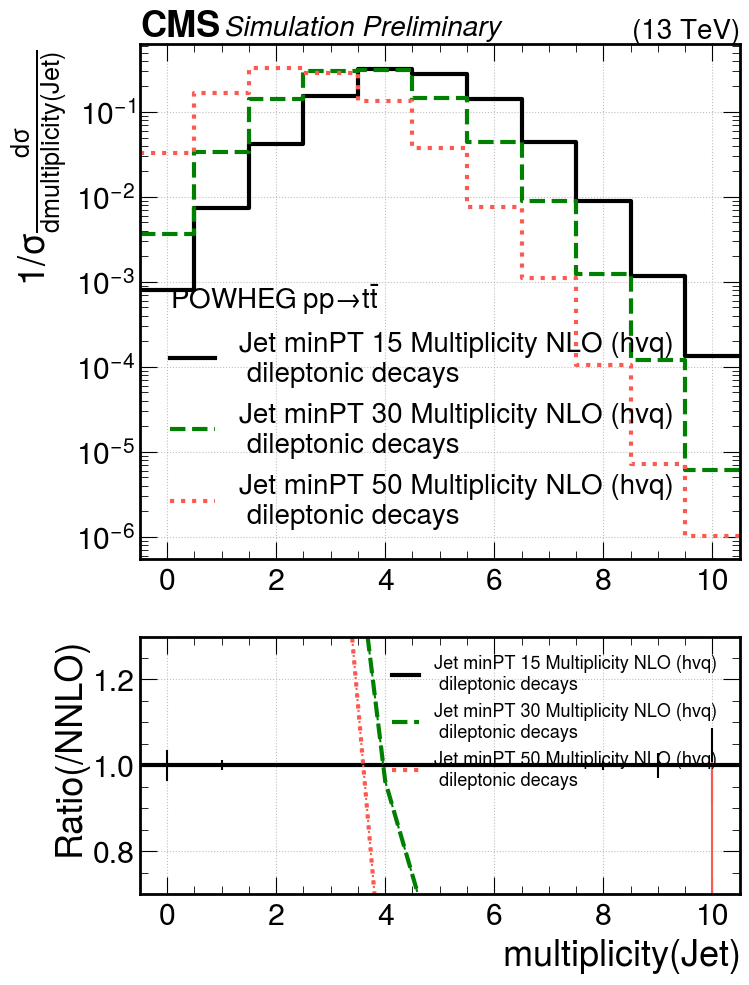

In [48]:
# jet multiplicity

args_multiplicity = [(X0_minPT_15_nJets[:,0], X0_wgt, 'Jet minPT 15 Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X0_minPT_30_nJets[:,0], X0_wgt, 'Jet minPT 30 Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X0_minPT_50_nJets[:,0], X0_wgt, 'Jet minPT 50 Multiplicity NLO (hvq) \n dileptonic decays')]


bins = np.linspace(-0.5, 10.5, 12)

DCTR.plot_ratio_cms(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')


### MiNNLO

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


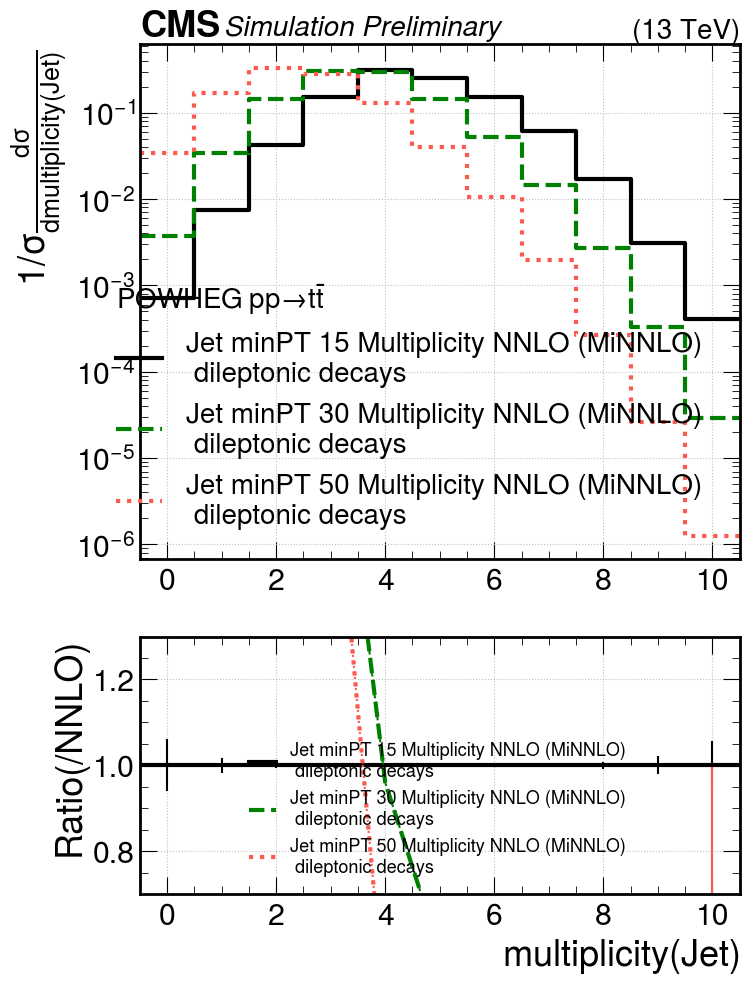

In [49]:
# jet multiplicity

args_multiplicity = [(X1_minPT_15_nJets[:,0], X1_wgt, 'Jet minPT 15 Multiplicity NNLO (MiNNLO) \n dileptonic decays'),
                     (X1_minPT_30_nJets[:,0], X1_wgt, 'Jet minPT 30 Multiplicity NNLO (MiNNLO) \n dileptonic decays'),
                     (X1_minPT_50_nJets[:,0], X1_wgt, 'Jet minPT 50 Multiplicity NNLO (MiNNLO) \n dileptonic decays')]


bins = np.linspace(-0.5, 10.5, 12)

DCTR.plot_ratio_cms(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')


## hvq vs MiNNLO

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


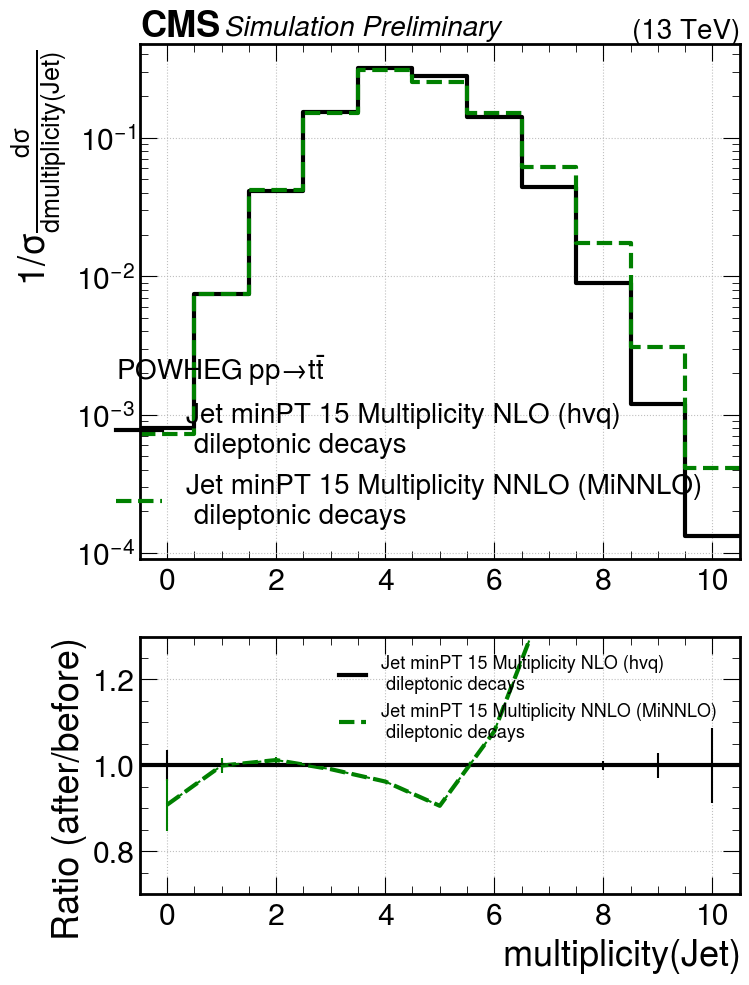

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


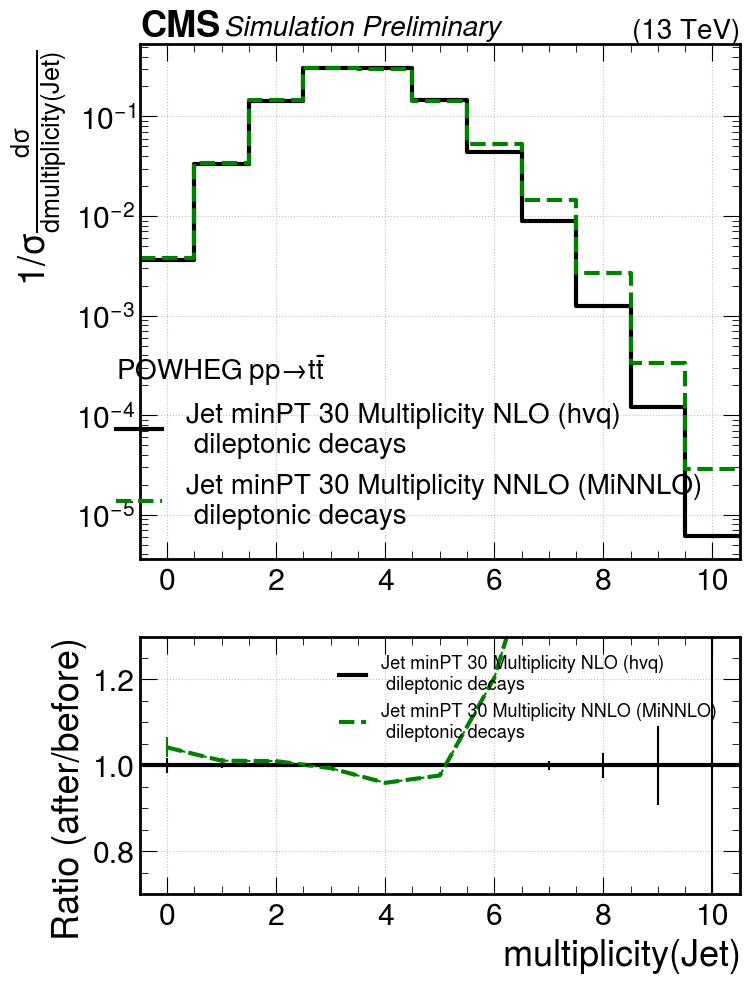

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


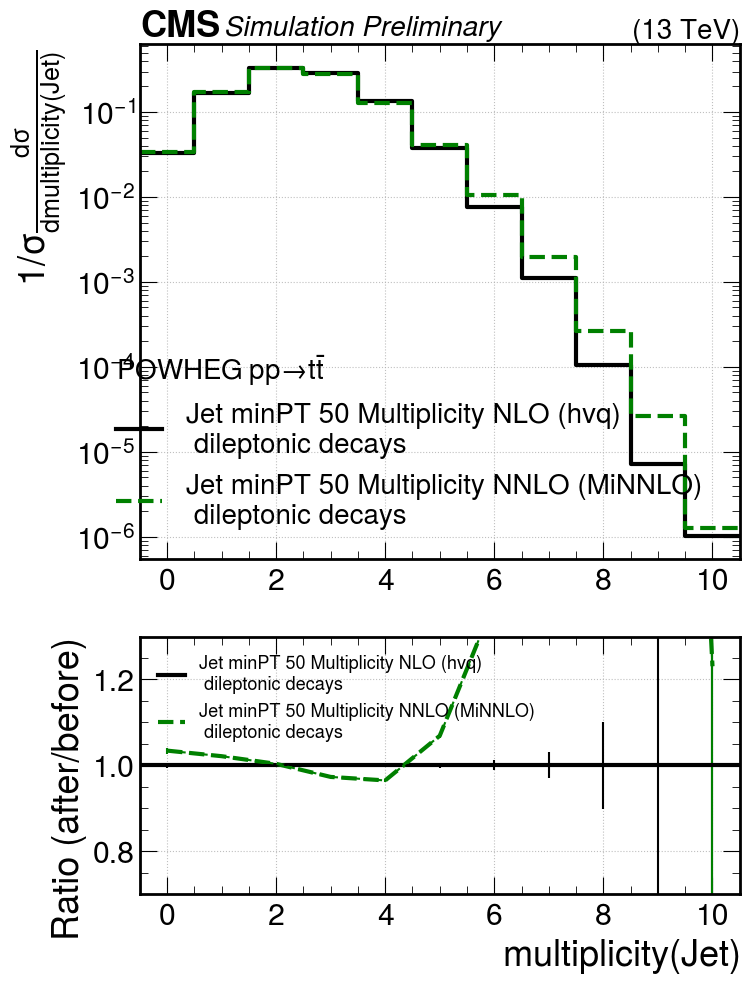

In [50]:
# jet multiplicity

args_multiplicity = [(X0_minPT_15_nJets[:,0], X0_wgt, 'Jet minPT 15 Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X1_minPT_15_nJets[:,0], X1_wgt, 'Jet minPT 15 Multiplicity NNLO (MiNNLO) \n dileptonic decays')]


bins = np.linspace(-0.5, 10.5, 12)

DCTR.plot_ratio_cms_2(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')


# jet multiplicity

args_multiplicity = [(X0_minPT_30_nJets[:,0], X0_wgt, 'Jet minPT 30 Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X1_minPT_30_nJets[:,0], X1_wgt, 'Jet minPT 30 Multiplicity NNLO (MiNNLO) \n dileptonic decays')]


DCTR.plot_ratio_cms_2(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')


# jet multiplicity

args_multiplicity = [(X0_minPT_50_nJets[:,0], X0_wgt, 'Jet minPT 50 Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X1_minPT_50_nJets[:,0], X1_wgt, 'Jet minPT 50 Multiplicity NNLO (MiNNLO) \n dileptonic decays')]


DCTR.plot_ratio_cms_2(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')



### pT(tt)

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


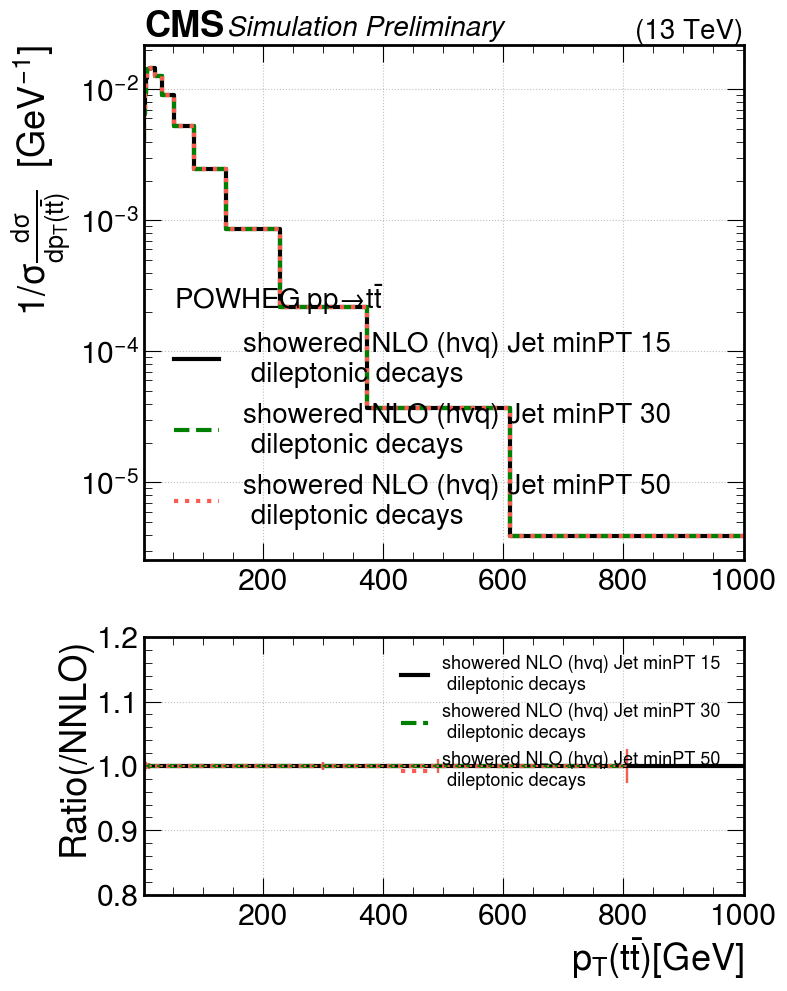

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


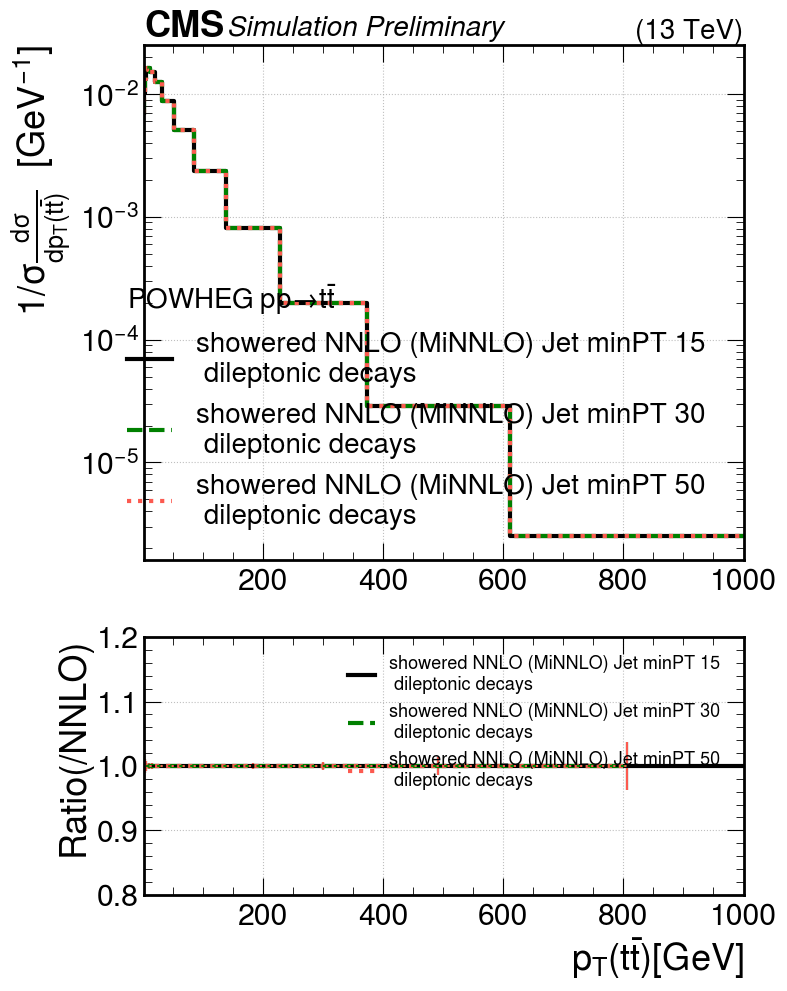

In [51]:
# jet cut_off should have no impact on parton pT

# hvq
args = [(X0_minPT_15, X0_wgt, 'showered NLO (hvq) Jet minPT 15 \n dileptonic decays'),
        (X0_minPT_30, X0_wgt, 'showered NLO (hvq) Jet minPT 30 \n dileptonic decays'),
        (X0_minPT_50, X0_wgt, 'showered NLO (hvq) Jet minPT 50 \n dileptonic decays')]

log_bins = np.logspace(np.log10(1), np.log10(1000), 15)


DCTR.plot_ratio_cms(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.8, 1.2])


# MiNNLO
args = [(X1_minPT_15, X1_wgt, 'showered NNLO (MiNNLO) Jet minPT 15 \n dileptonic decays'),
        (X1_minPT_30, X1_wgt, 'showered NNLO (MiNNLO) Jet minPT 30 \n dileptonic decays'),
        (X1_minPT_50, X1_wgt, 'showered NNLO (MiNNLO) Jet minPT 50 \n dileptonic decays')]

log_bins = np.logspace(np.log10(1), np.log10(1000), 15)


DCTR.plot_ratio_cms(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.8, 1.2])



# compare against old shower (HadronLevel:all = on)

In [52]:
num_events_old = 100000
# dileptonic hvq has all 1M events in one LHE
X0_old = np.load(f'{data_dir}/POWHEG_hvq/dileptonic/converted_lhe_hvq_dileptonic.npy')[:num_events_old]

# nrm data and save to disk (only needed to run once)
'''
nrm_array_dir = f'{data_dir}/POWHEG_hvq/showered/'
nrm_array = np.load(f'{nrm_array_dir}/norm_array_lhe_01.npy')
X0_old_nrm, _ = DCTR.normalize_data(X0_old.copy(), nrm_array)
np.save(f'{data_dir}/POWHEG_hvq/dileptonic/normed_lhe_hvq_dileptonic.npy', X0_old_nrm)
'''

X0_old_nrm = np.array(np.load(f'{data_dir}/POWHEG_hvq/dileptonic/normed_lhe_hvq_dileptonic.npy')[:num_events_old])

X0_old_nJets = np.array(np.load(f'{data_dir}/POWHEG_hvq/dileptonic/jet_multiplicity_hvq_dileptonic.npy')[:num_events_old])

X0_old_wgt = X0_old_nJets[:, 1]

X0_old_jet = np.array(np.load(f'{data_dir}/POWHEG_hvq/dileptonic/jet_4vectors_hvq_dileptonic.npy')[:num_events_old])

print(X0_old.shape)
print(X0_old_nrm.shape)
print(X0_old_nJets.shape)
print(X0_old_jet.shape)


(100000, 3, 9)
(100000, 3, 9)
(100000, 2)
(100000, 20, 6)


/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1792: RuntimeWarning: invalid value encountered in true_divide
  ratio_0 = hist0 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1793: RuntimeWarning: divide by zero encountered in true_divide
  ratio_1 = hist1 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1793: RuntimeWarning: invalid value encountered in true_divide
  ratio_1 = hist1 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


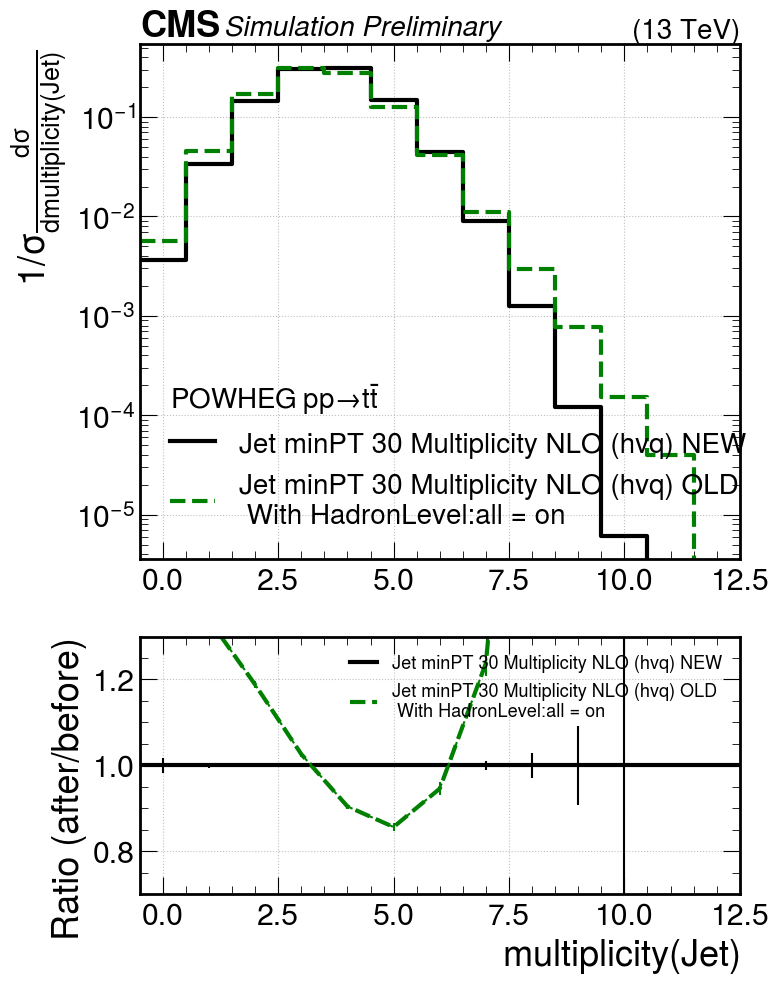

In [53]:
# jet multiplicity
args_multiplicity = [(X0_minPT_30_nJets[:,0], X0_wgt, 'Jet minPT 30 Multiplicity NLO (hvq) NEW'),
                     (X0_old_nJets[:,0], X0_old_wgt, 'Jet minPT 30 Multiplicity NLO (hvq) OLD \n With HadronLevel:all = on')]


bins = np.linspace(-0.5, 12.5, 14)

DCTR.plot_ratio_cms_2(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')


/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


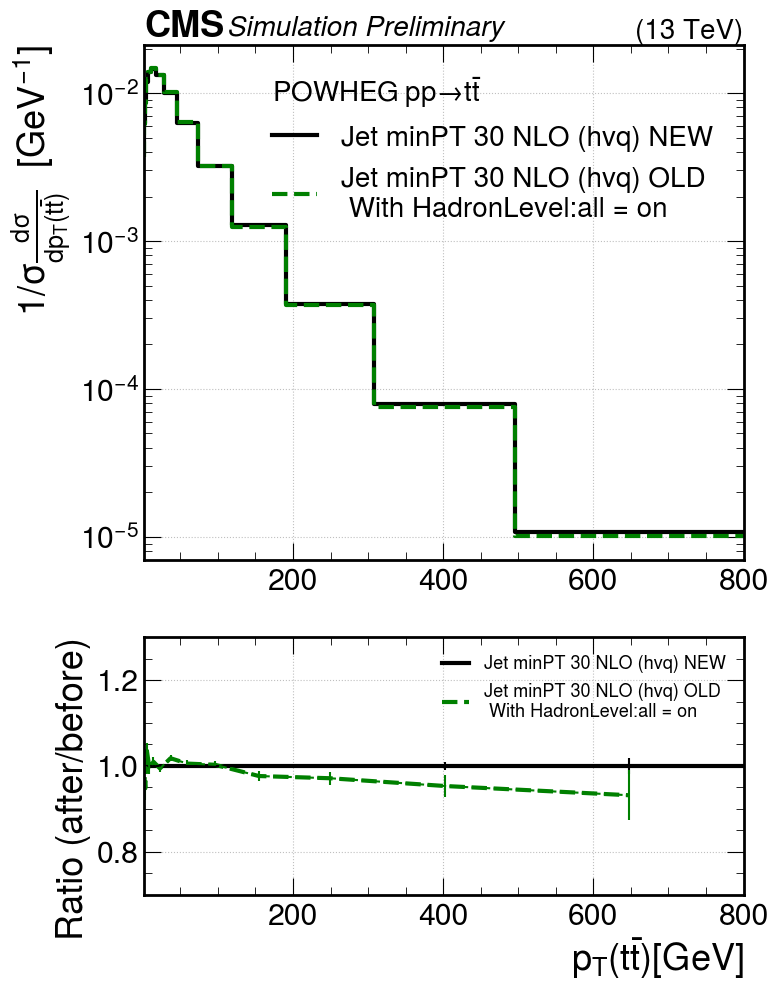

In [54]:
# pT
args = [(X0_minPT_30, X0_wgt, 'Jet minPT 30 NLO (hvq) NEW'),
        (X0_old, X0_old_wgt, 'Jet minPT 30 NLO (hvq) OLD \n With HadronLevel:all = on')]



bins = np.logspace(np.log10(1), np.log10(800), 15)

DCTR.plot_ratio_cms_2(args, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3])


# DCTR reweighting


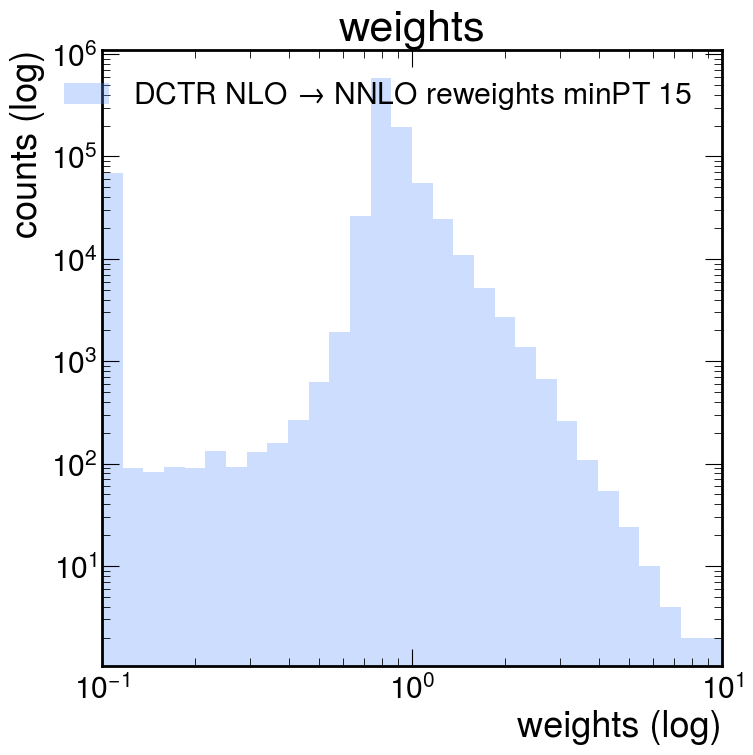

In [55]:
# calculate weights from DCTR trained on showered events
model = '../20240521_showered_new/train_20240523_regular_epochs.tf' # path to previously trained model (in .tf format (folder)) for showered events

dctr_rwgt = []
# calculate rwgt
with tf.device('CPU'):
    dctr_rwgt_minPT_15 = DCTR.get_rwgt([model], X0_minPT_15_nrm) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook

wgts_plot = [(dctr_rwgt_minPT_15[0], r'DCTR NLO $\to$ NNLO reweights minPT 15')]

DCTR.plot_weights(wgts_plot, start = 0.1, stop = 10)

# apply orginal generator weights to rwgt
dctr_rwgt_minPT_15 = np.multiply(dctr_rwgt_minPT_15[0], X0_wgt)



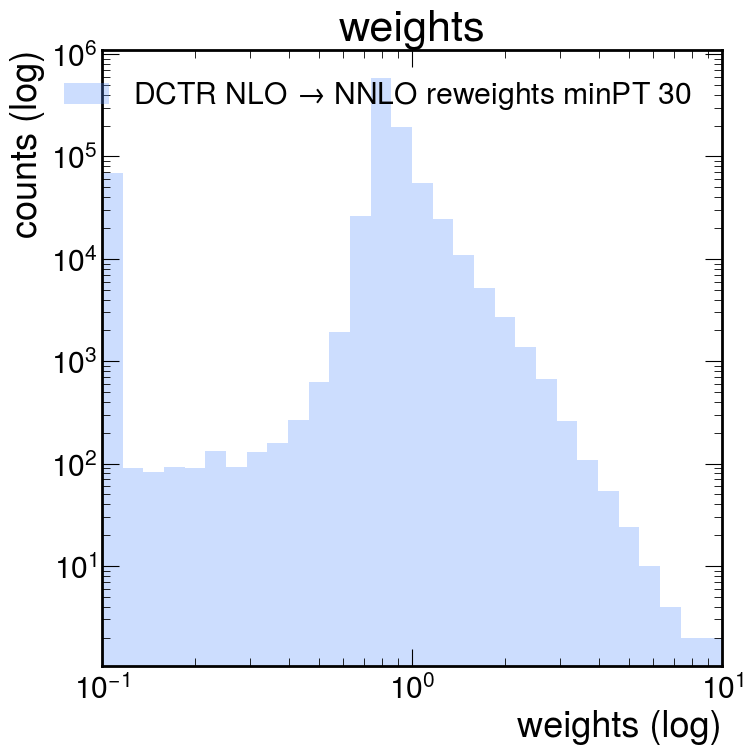

In [56]:
# calculate weights from DCTR trained on showered events
model = '../20240521_showered_new/train_20240523_regular_epochs.tf' # path to previously trained model (in .tf format (folder)) for showered events

dctr_rwgt = []
# calculate rwgt
with tf.device('CPU'):
    dctr_rwgt_minPT_30 = DCTR.get_rwgt([model], X0_minPT_30_nrm) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook

wgts_plot = [(dctr_rwgt_minPT_30[0], r'DCTR NLO $\to$ NNLO reweights minPT 30')]

DCTR.plot_weights(wgts_plot, start = 0.1, stop = 10)

# apply orginal generator weights to rwgt
dctr_rwgt_minPT_30 = np.multiply(dctr_rwgt_minPT_30[0], X0_wgt)



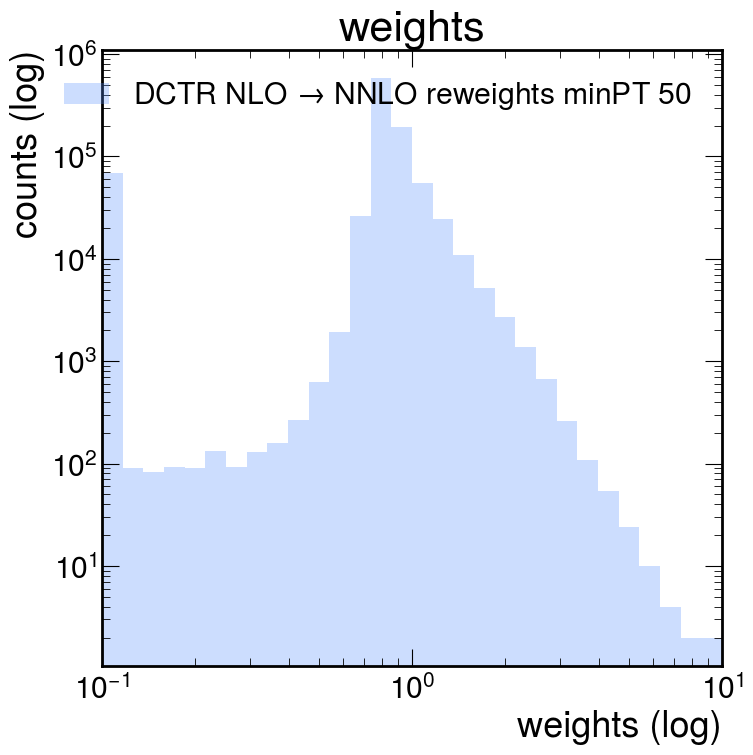

In [57]:
# calculate weights from DCTR trained on showered events
model = '../20240521_showered_new/train_20240523_regular_epochs.tf' # path to previously trained model (in .tf format (folder)) for showered events

dctr_rwgt = []
# calculate rwgt
with tf.device('CPU'):
    dctr_rwgt_minPT_50 = DCTR.get_rwgt([model], X0_minPT_50_nrm) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook

wgts_plot = [(dctr_rwgt_minPT_50[0], r'DCTR NLO $\to$ NNLO reweights minPT 50')]

DCTR.plot_weights(wgts_plot, start = 0.1, stop = 10)

# apply orginal generator weights to rwgt
dctr_rwgt_minPT_50 = np.multiply(dctr_rwgt_minPT_50[0], X0_wgt)



/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


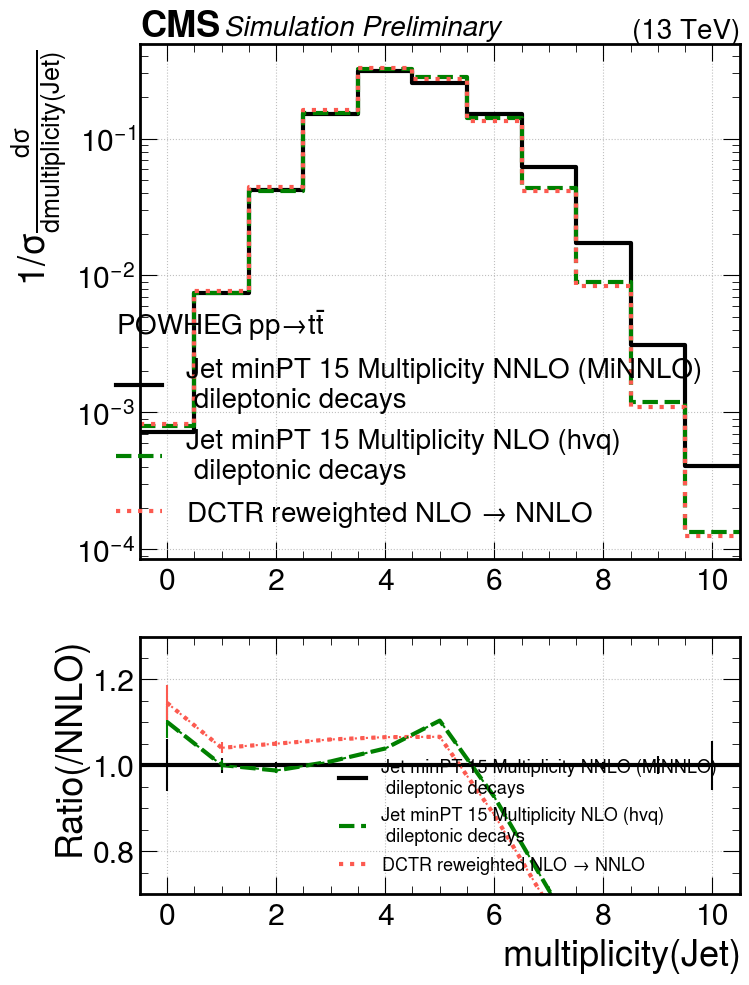

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


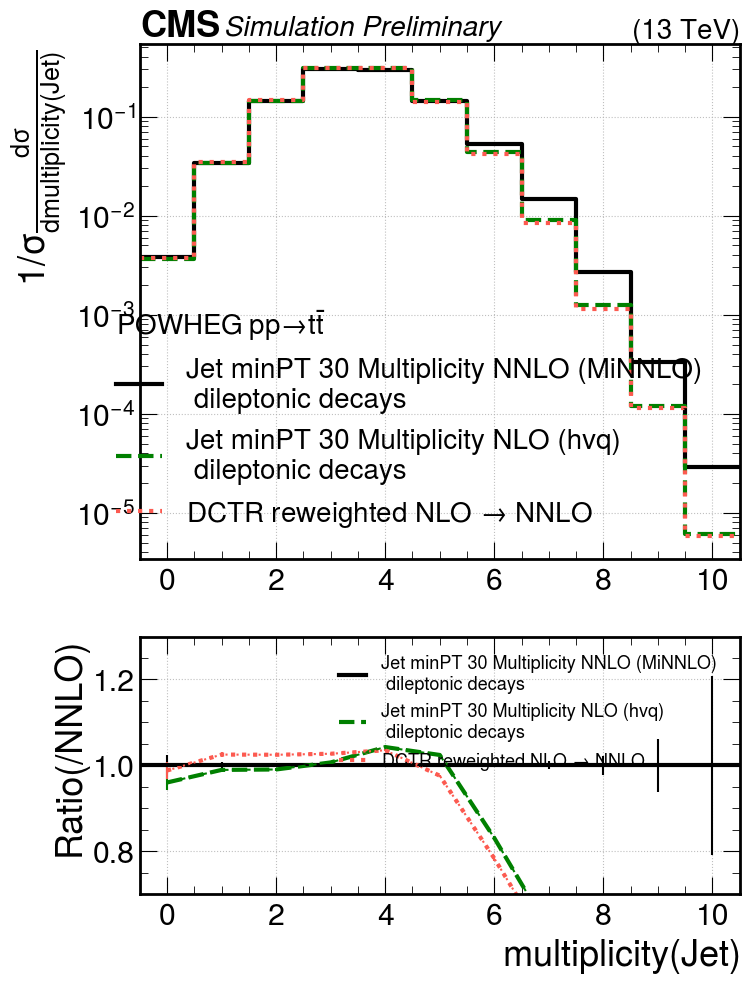

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


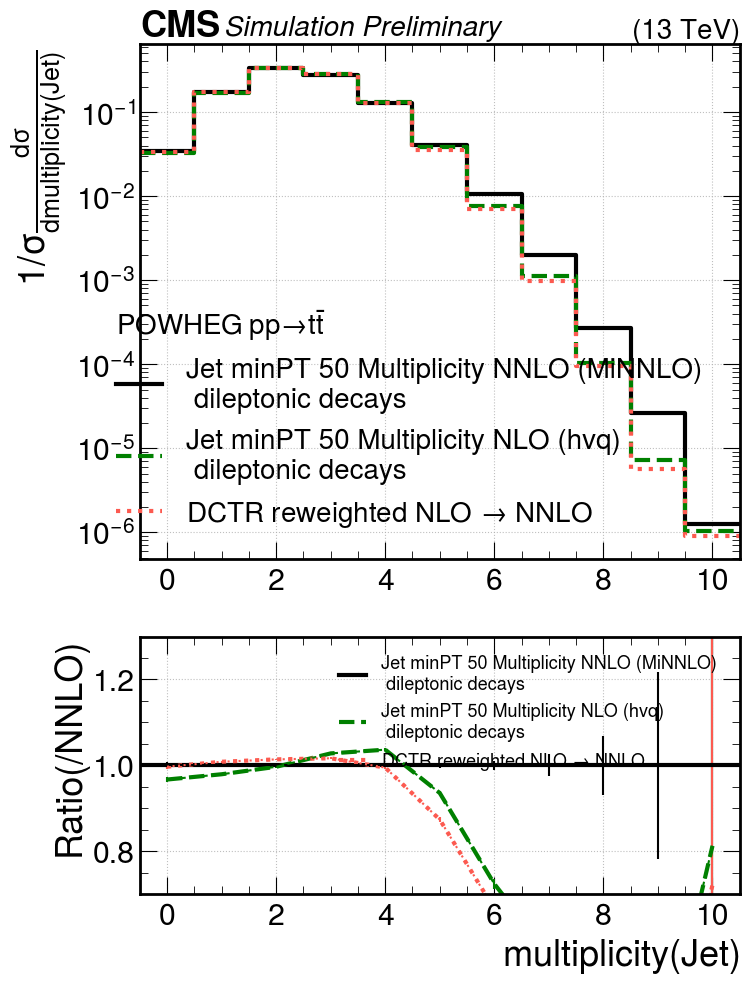

In [58]:
# jet multiplicity

args_multiplicity = [(X1_minPT_15_nJets[:,0], X1_wgt, 'Jet minPT 15 Multiplicity NNLO (MiNNLO) \n dileptonic decays'),
                     (X0_minPT_15_nJets[:,0], X0_wgt, 'Jet minPT 15 Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X0_minPT_15_nJets[:,0], dctr_rwgt_minPT_15, r'DCTR reweighted NLO $\to$ NNLO')]

bins = np.linspace(-0.5, 10.5, 12)
ratio_ylim=[0.7, 1.3]


DCTR.plot_ratio_cms(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=ratio_ylim, part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')



args_multiplicity = [(X1_minPT_30_nJets[:,0], X1_wgt, 'Jet minPT 30 Multiplicity NNLO (MiNNLO) \n dileptonic decays'),
                     (X0_minPT_30_nJets[:,0], X0_wgt, 'Jet minPT 30 Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X0_minPT_30_nJets[:,0], dctr_rwgt_minPT_30, r'DCTR reweighted NLO $\to$ NNLO')]

DCTR.plot_ratio_cms(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=ratio_ylim, part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')



args_multiplicity = [(X1_minPT_50_nJets[:,0], X1_wgt, 'Jet minPT 50 Multiplicity NNLO (MiNNLO) \n dileptonic decays'),
                     (X0_minPT_50_nJets[:,0], X0_wgt, 'Jet minPT 50 Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X0_minPT_50_nJets[:,0], dctr_rwgt_minPT_50, r'DCTR reweighted NLO $\to$ NNLO')]

DCTR.plot_ratio_cms(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=ratio_ylim, part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')



/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


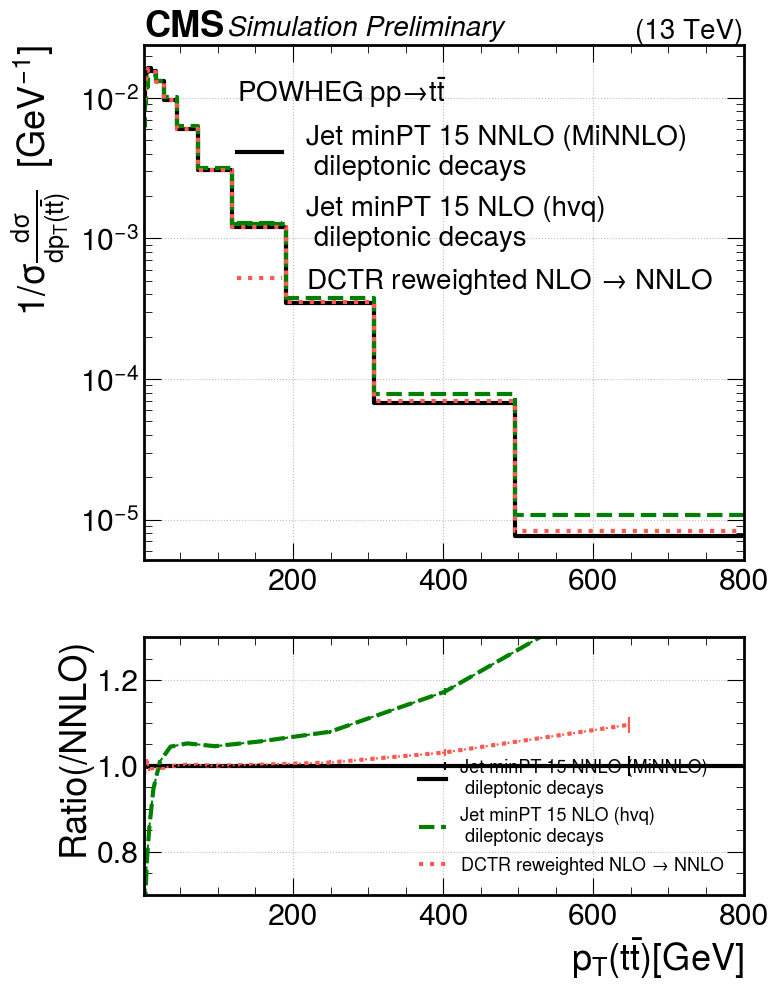

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


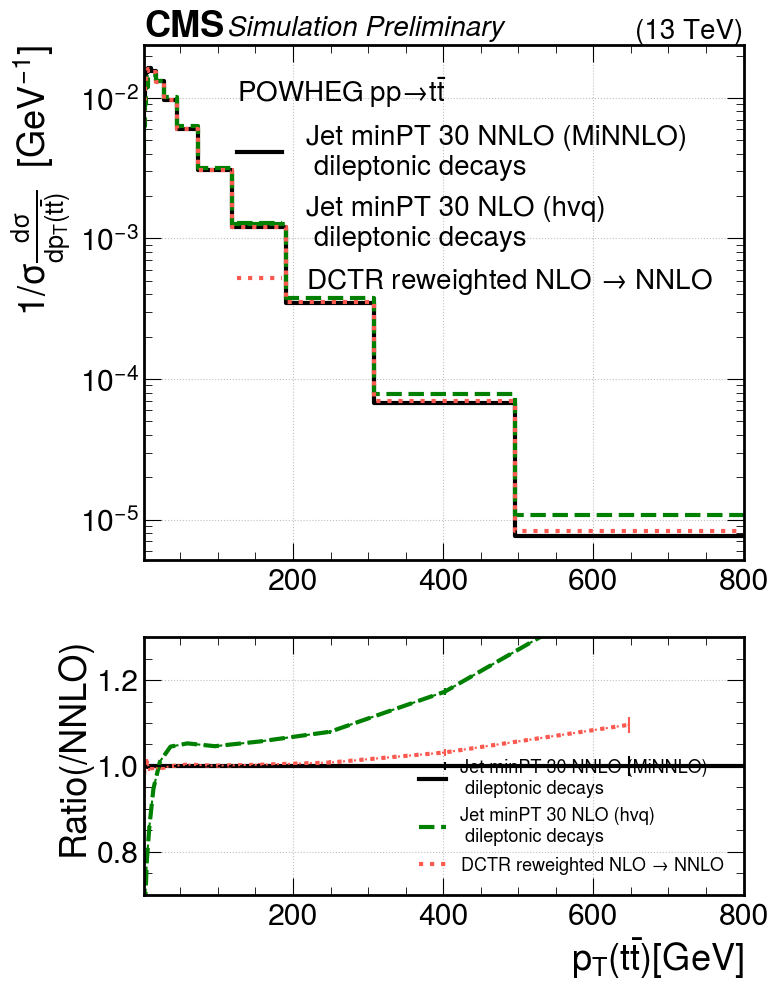

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


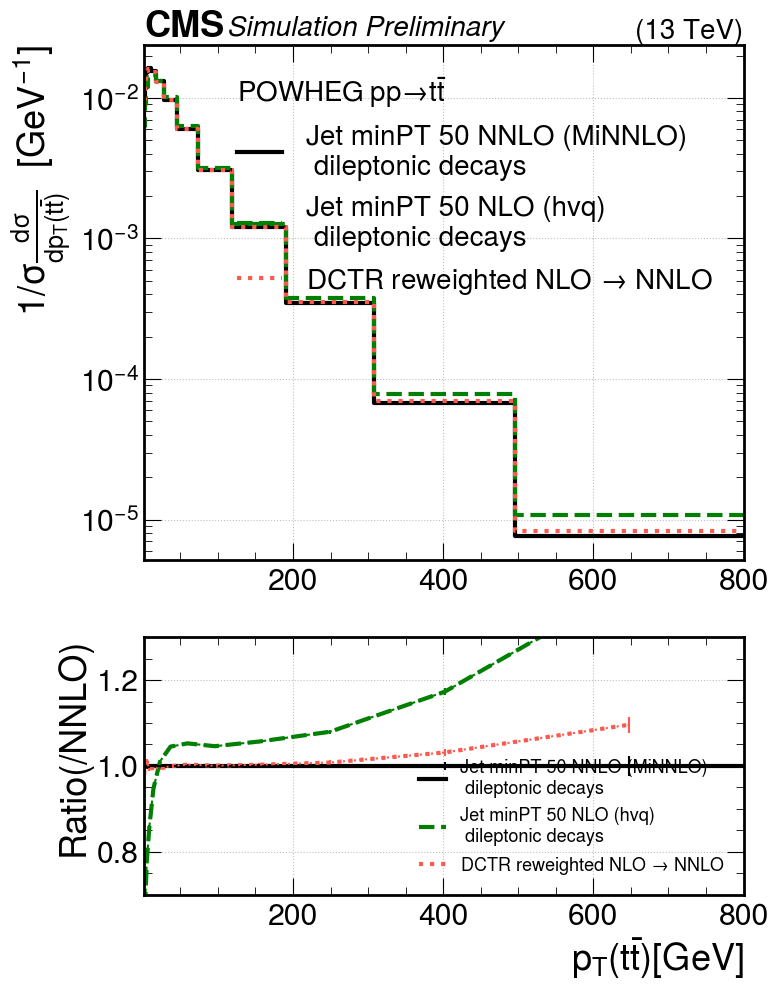

In [59]:
# pT

# jet multiplicity

args = [(X1_minPT_15, X1_wgt, 'Jet minPT 15 NNLO (MiNNLO) \n dileptonic decays'),
        (X0_minPT_15, X0_wgt, 'Jet minPT 15 NLO (hvq) \n dileptonic decays'),
        (X0_minPT_15, dctr_rwgt_minPT_15, r'DCTR reweighted NLO $\to$ NNLO')]


bins = np.logspace(np.log10(1), np.log10(800), 15)

DCTR.plot_ratio_cms(args, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3])


# jet multiplicity

args = [(X1_minPT_30, X1_wgt, 'Jet minPT 30 NNLO (MiNNLO) \n dileptonic decays'),
        (X0_minPT_30, X0_wgt, 'Jet minPT 30 NLO (hvq) \n dileptonic decays'),
        (X0_minPT_30, dctr_rwgt_minPT_30, r'DCTR reweighted NLO $\to$ NNLO')]


DCTR.plot_ratio_cms(args, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3])


# jet multiplicity


args = [(X1_minPT_50, X1_wgt, 'Jet minPT 50 NNLO (MiNNLO) \n dileptonic decays'),
        (X0_minPT_50, X0_wgt, 'Jet minPT 50 NLO (hvq) \n dileptonic decays'),
        (X0_minPT_50, dctr_rwgt_minPT_50, r'DCTR reweighted NLO $\to$ NNLO')]


DCTR.plot_ratio_cms(args, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3])



# jet p_t min pt 15

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


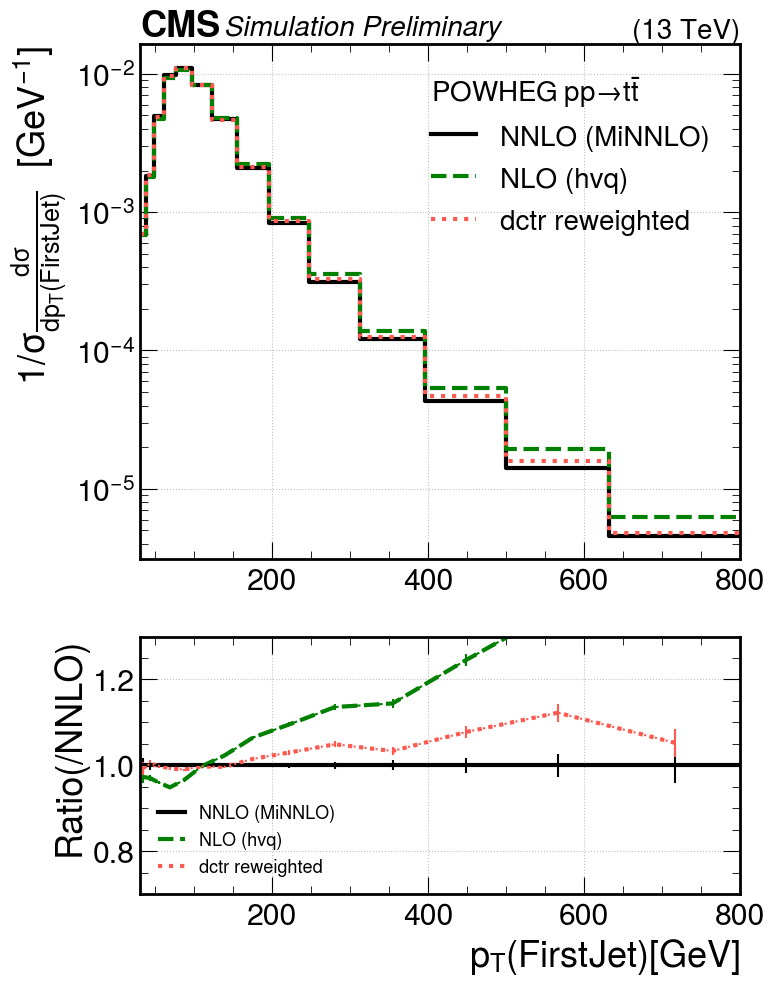

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


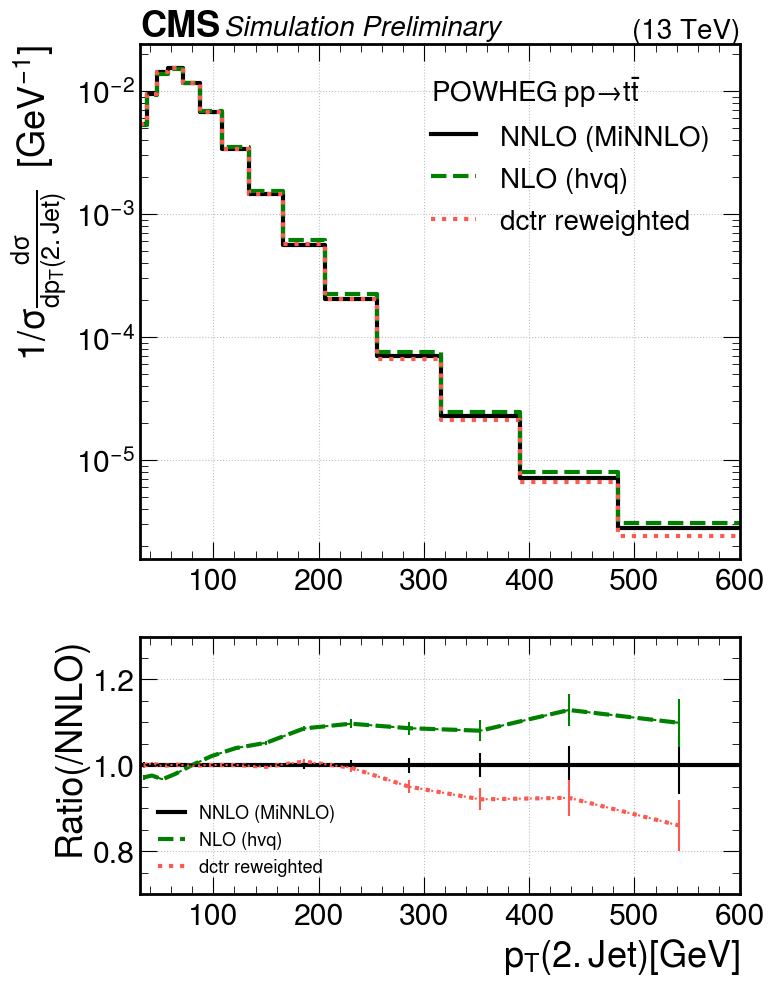

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


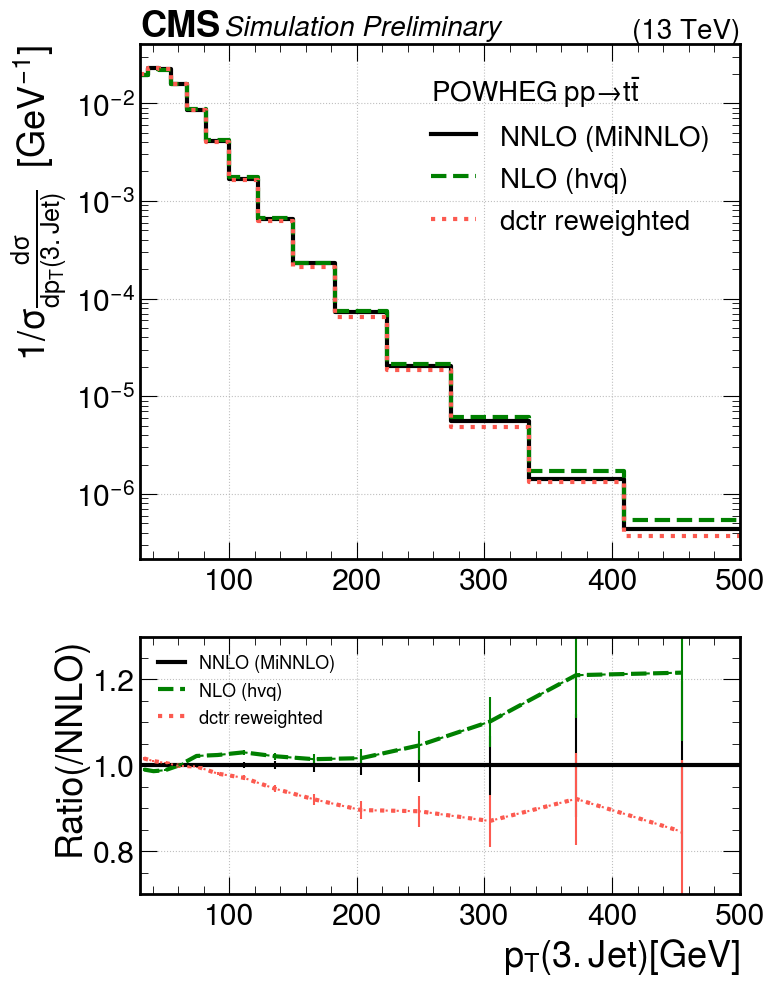

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


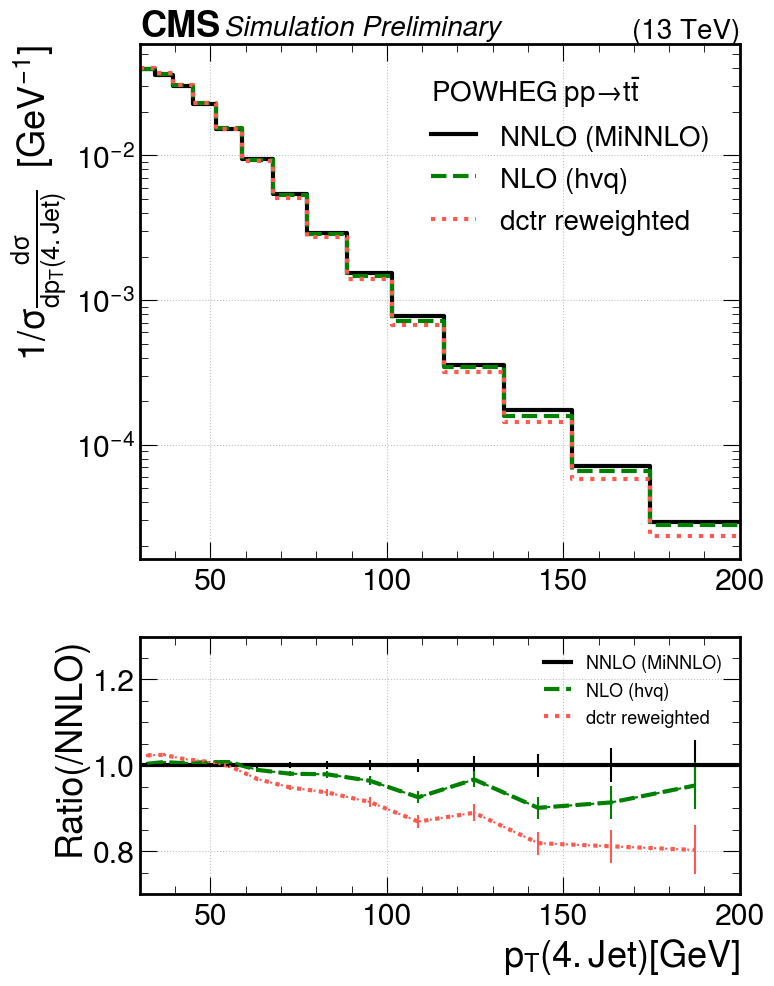

In [60]:
log_bins = np.logspace(np.log10(30), np.log10(800), 15)

args_jet_0 = [(X1_minPT_15_jet[:, 0, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_15_jet[:, 0, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_15_jet[:, 0, 0], dctr_rwgt_minPT_15, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_0, bins = log_bins, y_scale = 'log', part_label='First Jet', ratio_ylim=(0.7, 1.3))

log_bins = np.logspace(np.log10(30), np.log10(600), 15)
args_jet_1 = [(X1_minPT_15_jet[:, 1, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_15_jet[:, 1, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_15_jet[:, 1, 0], dctr_rwgt_minPT_15, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_1, bins = log_bins, y_scale = 'log', part_label='2. Jet', ratio_ylim=(0.7, 1.3))

log_bins = np.logspace(np.log10(30), np.log10(500), 15)
args_jet_2 = [(X1_minPT_15_jet[:, 2, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_15_jet[:, 2, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_15_jet[:, 2, 0], dctr_rwgt_minPT_15, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_2, bins = log_bins, y_scale = 'log', part_label='3. Jet', ratio_ylim=(0.7, 1.3))

log_bins = np.logspace(np.log10(30), np.log10(200), 15)
args_jet_3 = [(X1_minPT_15_jet[:, 3, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_15_jet[:, 3, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_15_jet[:, 3, 0], dctr_rwgt_minPT_15, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_3, bins = log_bins, y_scale = 'log', part_label='4. Jet', ratio_ylim=(0.7, 1.3))



np.shape(X0_minPT_15_jet_pt_sums) = (985997,)
np.shape(X1_minPT_15_jet_pt_sums) = (985997,)


/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


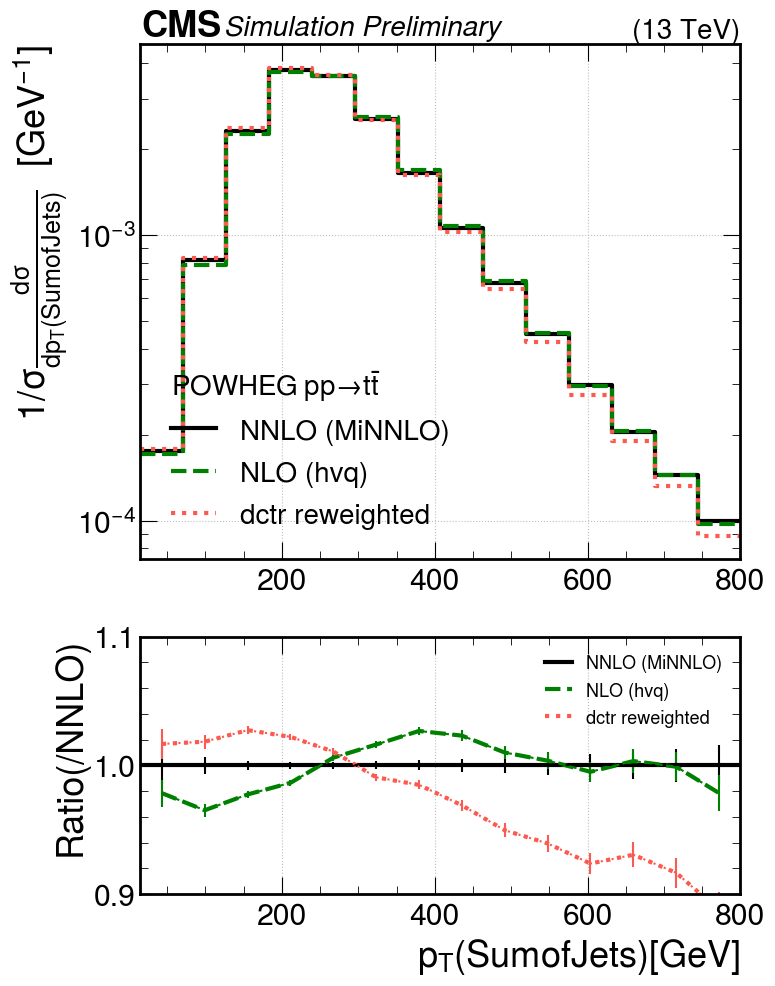

In [61]:
# sum of jet pt per event

X0_minPT_15_jet_pt_sums = []
for event in X0_minPT_15_jet:
    X0_minPT_15_jet_pt_sums.append(np.sum(event[:,0]))

X1_minPT_15_jet_pt_sums = []
for event in X1_minPT_15_jet:
    X1_minPT_15_jet_pt_sums.append(np.sum(event[:,0]))

    
print(f'{np.shape(X0_minPT_15_jet_pt_sums) = }')
print(f'{np.shape(X1_minPT_15_jet_pt_sums) = }')
log_bins = np.logspace(np.log10(10), np.log10(1000), 15)

args_jet_sum = [(np.array(X1_minPT_15_jet_pt_sums), X1_wgt, 'NNLO (MiNNLO)'),
                (np.array(X0_minPT_15_jet_pt_sums), X0_wgt, 'NLO (hvq)'),
                (np.array(X0_minPT_15_jet_pt_sums), dctr_rwgt_minPT_15, 'dctr reweighted')]

#log_bins = np.logspace(np.log10(30), np.log10(1000), 15)
lin_bins = np.linspace(15, 800, 15)

DCTR.plot_ratio_cms(args_jet_sum, bins = lin_bins, y_scale = 'log', part_label='Sum of Jets', ratio_ylim=(0.9, 1.1))




# jet p_t min pt 30

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


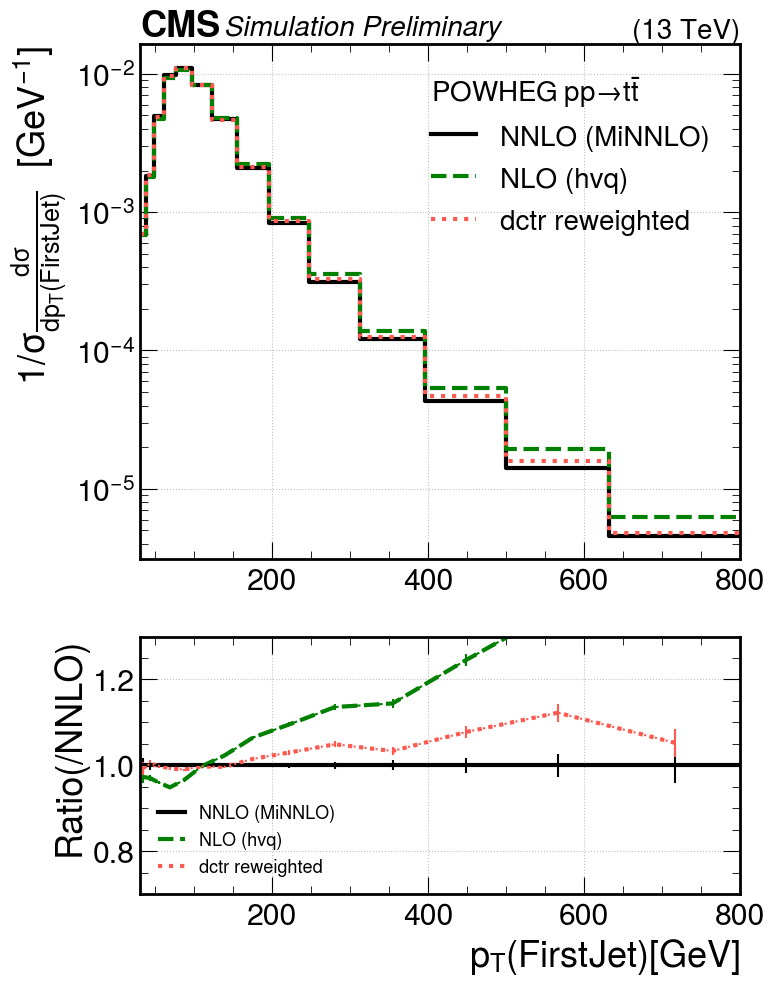

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


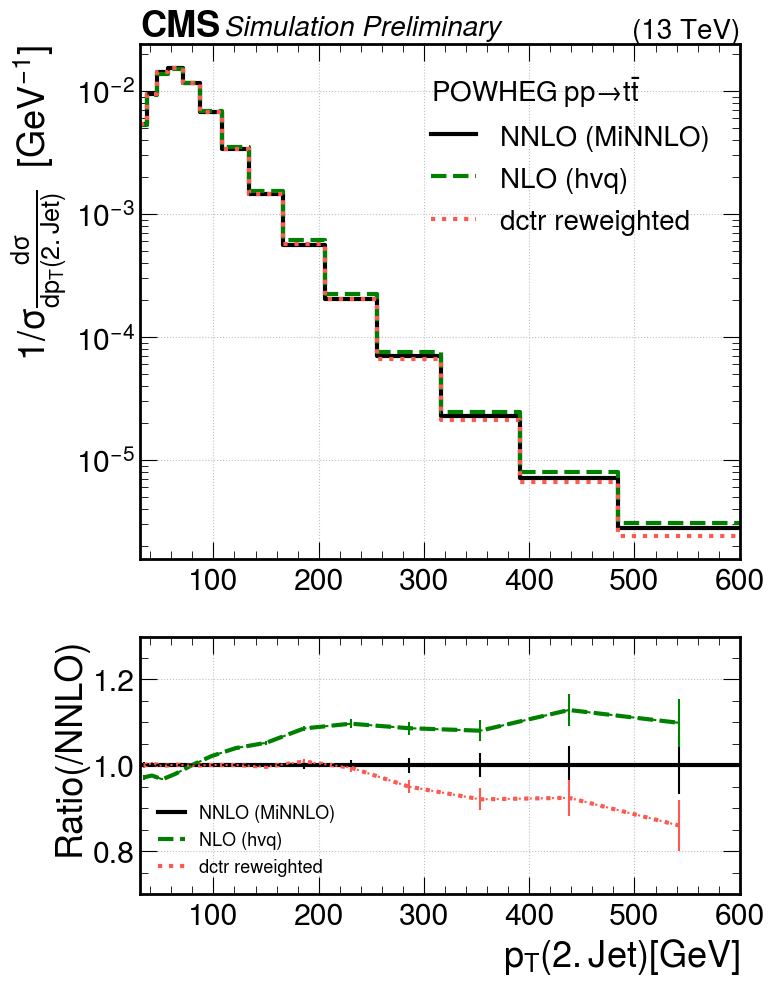

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


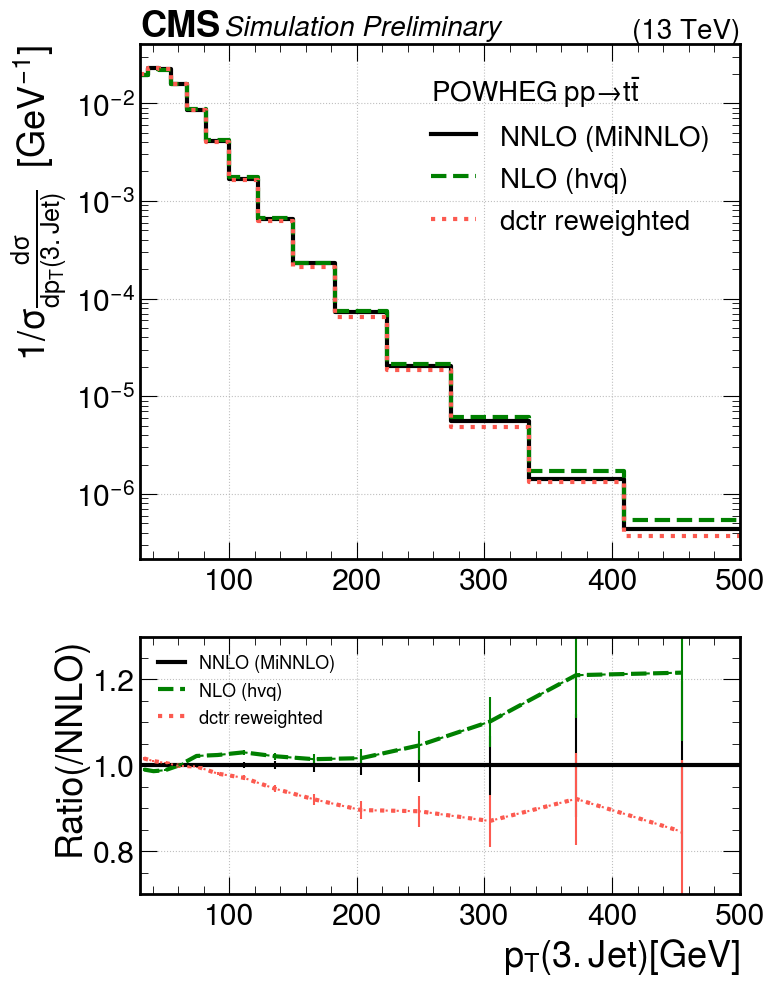

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


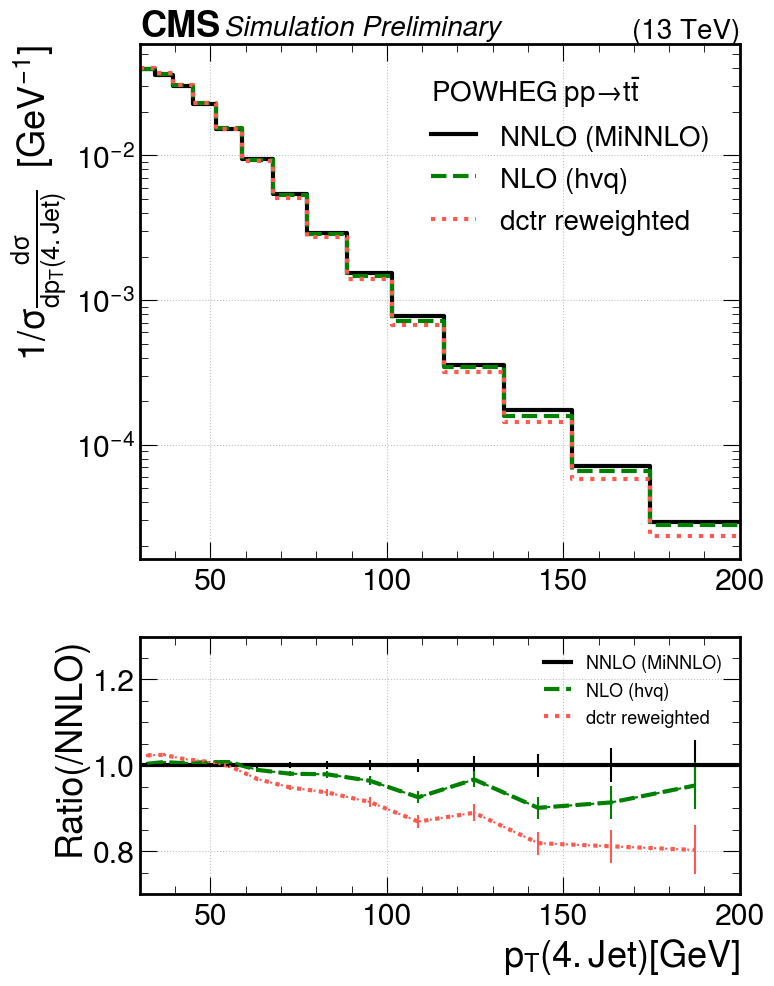

np.shape(X0_minPT_30_jet_pt_sums) = (985997,)
np.shape(X1_minPT_30_jet_pt_sums) = (985997,)


/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


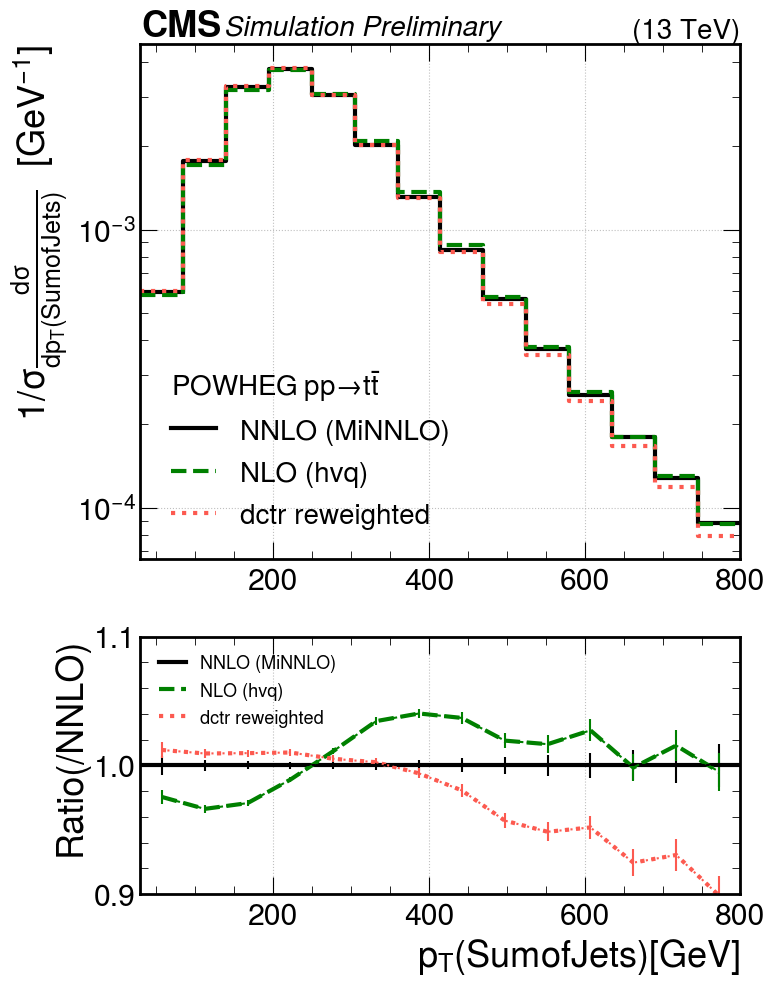

In [62]:
# jet p_t min pt 30
log_bins = np.logspace(np.log10(30), np.log10(800), 15)

args_jet_0 = [(X1_minPT_50_jet[:, 0, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_50_jet[:, 0, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_50_jet[:, 0, 0], dctr_rwgt_minPT_50, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_0, bins = log_bins, y_scale = 'log', part_label='First Jet', ratio_ylim=(0.7, 1.3))

log_bins = np.logspace(np.log10(30), np.log10(600), 15)
args_jet_1 = [(X1_minPT_50_jet[:, 1, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_50_jet[:, 1, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_50_jet[:, 1, 0], dctr_rwgt_minPT_50, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_1, bins = log_bins, y_scale = 'log', part_label='2. Jet', ratio_ylim=(0.7, 1.3))

log_bins = np.logspace(np.log10(30), np.log10(500), 15)
args_jet_2 = [(X1_minPT_50_jet[:, 2, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_50_jet[:, 2, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_50_jet[:, 2, 0], dctr_rwgt_minPT_50, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_2, bins = log_bins, y_scale = 'log', part_label='3. Jet', ratio_ylim=(0.7, 1.3))

log_bins = np.logspace(np.log10(30), np.log10(200), 15)
args_jet_3 = [(X1_minPT_50_jet[:, 3, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_50_jet[:, 3, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_50_jet[:, 3, 0], dctr_rwgt_minPT_50, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_3, bins = log_bins, y_scale = 'log', part_label='4. Jet', ratio_ylim=(0.7, 1.3))


# sum of jet pt per event

X0_minPT_50_jet_pt_sums = []
for event in X0_minPT_50_jet:
    X0_minPT_50_jet_pt_sums.append(np.sum(event[:,0]))

X1_minPT_50_jet_pt_sums = []
for event in X1_minPT_50_jet:
    X1_minPT_50_jet_pt_sums.append(np.sum(event[:,0]))

    
print(f'{np.shape(X0_minPT_50_jet_pt_sums) = }')
print(f'{np.shape(X1_minPT_50_jet_pt_sums) = }')
log_bins = np.logspace(np.log10(10), np.log10(1000), 15)

args_jet_sum = [(np.array(X1_minPT_50_jet_pt_sums), X1_wgt, 'NNLO (MiNNLO)'),
                (np.array(X0_minPT_50_jet_pt_sums), X0_wgt, 'NLO (hvq)'),
                (np.array(X0_minPT_50_jet_pt_sums), dctr_rwgt_minPT_50, 'dctr reweighted')]

#log_bins = np.logspace(np.log10(30), np.log10(1000), 15)
lin_bins = np.linspace(30, 800, 15)

DCTR.plot_ratio_cms(args_jet_sum, bins = lin_bins, y_scale = 'log', part_label='Sum of Jets', ratio_ylim=(0.9, 1.1))




# jet p_t min pt 50

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


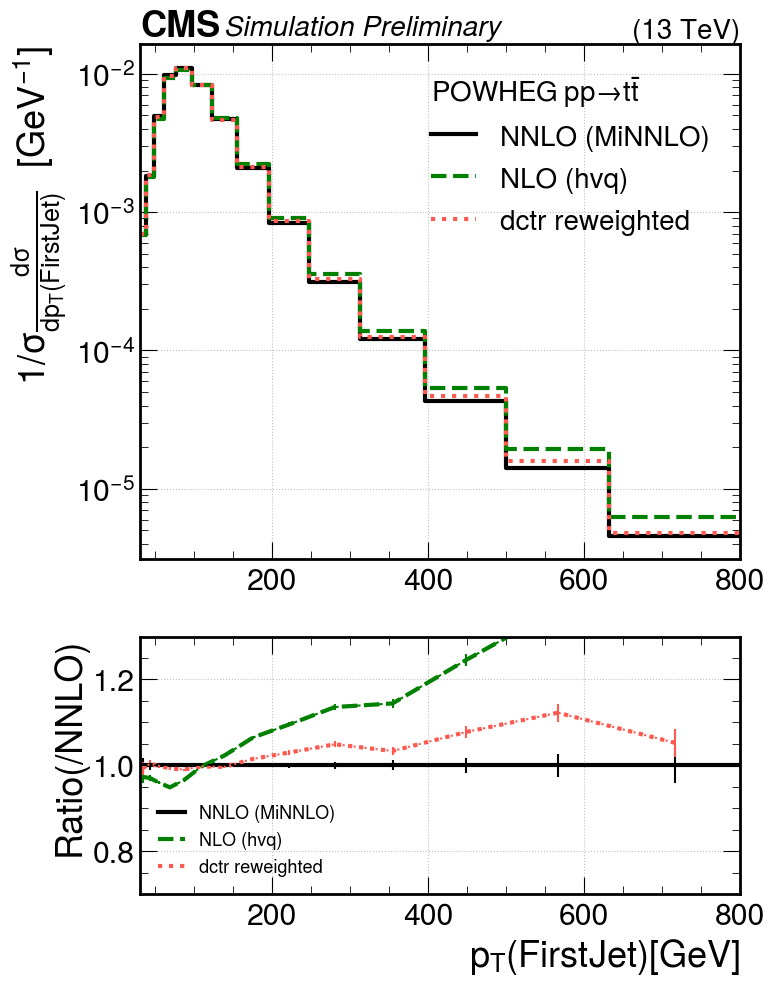

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


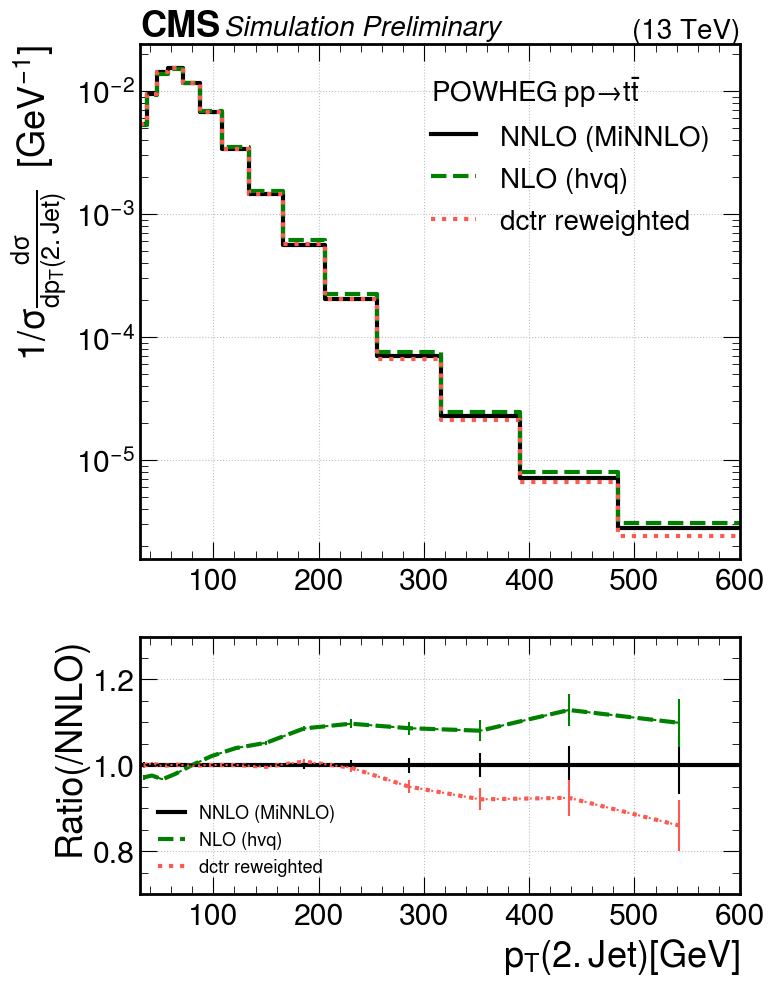

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


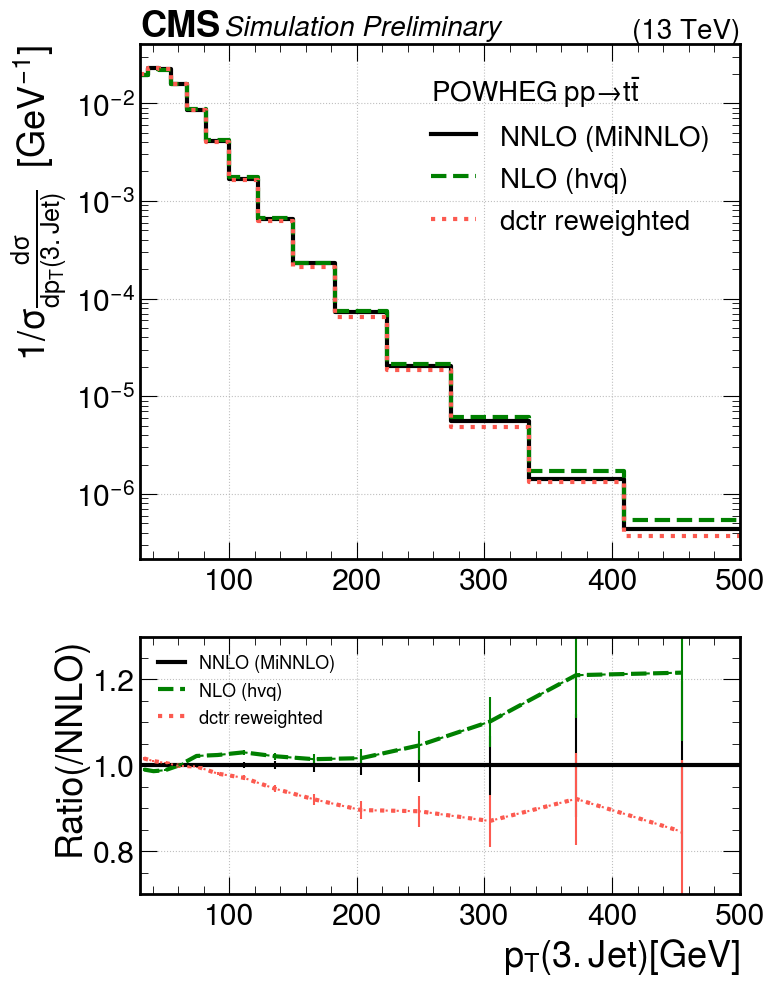

/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


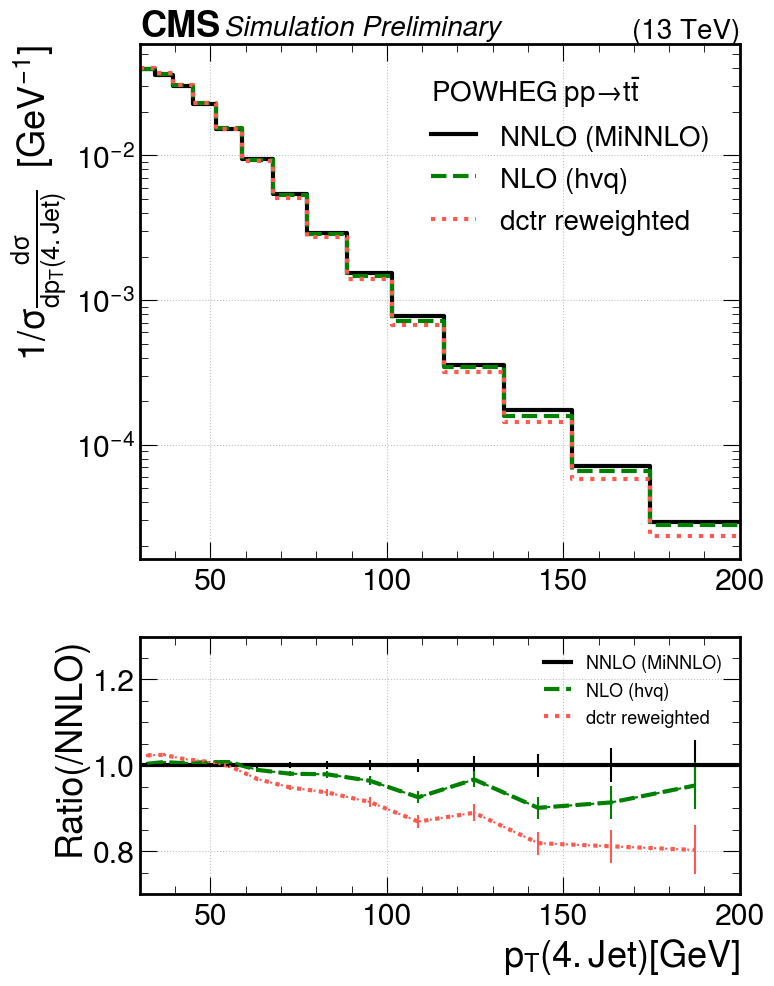

np.shape(X0_minPT_30_jet_pt_sums) = (985997,)
np.shape(X1_minPT_30_jet_pt_sums) = (985997,)


/home/finn/DCTR_Paper/DCTR_FP/20240712_jets_newer/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


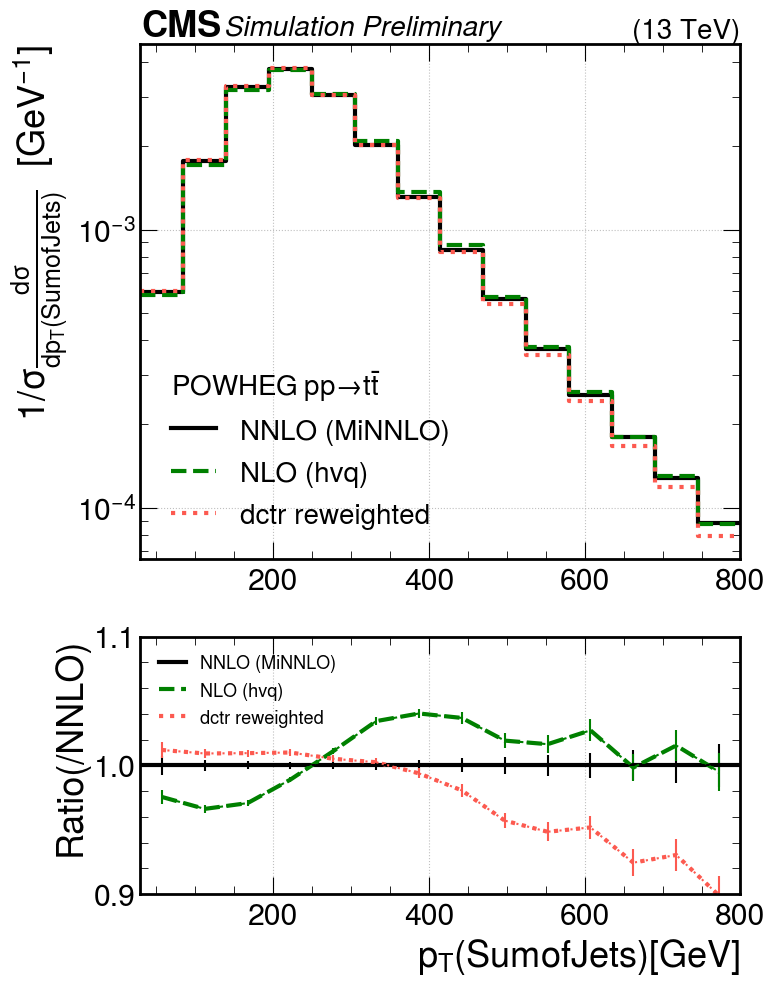

In [63]:
# jet p_t min pt 50
log_bins = np.logspace(np.log10(30), np.log10(800), 15)

args_jet_0 = [(X1_minPT_30_jet[:, 0, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_30_jet[:, 0, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_30_jet[:, 0, 0], dctr_rwgt_minPT_30, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_0, bins = log_bins, y_scale = 'log', part_label='First Jet', ratio_ylim=(0.7, 1.3))

log_bins = np.logspace(np.log10(30), np.log10(600), 15)
args_jet_1 = [(X1_minPT_30_jet[:, 1, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_30_jet[:, 1, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_30_jet[:, 1, 0], dctr_rwgt_minPT_30, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_1, bins = log_bins, y_scale = 'log', part_label='2. Jet', ratio_ylim=(0.7, 1.3))

log_bins = np.logspace(np.log10(30), np.log10(500), 15)
args_jet_2 = [(X1_minPT_30_jet[:, 2, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_30_jet[:, 2, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_30_jet[:, 2, 0], dctr_rwgt_minPT_30, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_2, bins = log_bins, y_scale = 'log', part_label='3. Jet', ratio_ylim=(0.7, 1.3))

log_bins = np.logspace(np.log10(30), np.log10(200), 15)
args_jet_3 = [(X1_minPT_30_jet[:, 3, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_minPT_30_jet[:, 3, 0], X0_wgt, 'NLO (hvq)'),
              (X0_minPT_30_jet[:, 3, 0], dctr_rwgt_minPT_30, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_3, bins = log_bins, y_scale = 'log', part_label='4. Jet', ratio_ylim=(0.7, 1.3))


# sum of jet pt per event

X0_minPT_30_jet_pt_sums = []
for event in X0_minPT_30_jet:
    X0_minPT_30_jet_pt_sums.append(np.sum(event[:,0]))

X1_minPT_30_jet_pt_sums = []
for event in X1_minPT_30_jet:
    X1_minPT_30_jet_pt_sums.append(np.sum(event[:,0]))

    
print(f'{np.shape(X0_minPT_30_jet_pt_sums) = }')
print(f'{np.shape(X1_minPT_30_jet_pt_sums) = }')
log_bins = np.logspace(np.log10(10), np.log10(1000), 15)

args_jet_sum = [(np.array(X1_minPT_30_jet_pt_sums), X1_wgt, 'NNLO (MiNNLO)'),
                (np.array(X0_minPT_30_jet_pt_sums), X0_wgt, 'NLO (hvq)'),
                (np.array(X0_minPT_30_jet_pt_sums), dctr_rwgt_minPT_30, 'dctr reweighted')]

#log_bins = np.logspace(np.log10(30), np.log10(1000), 15)
lin_bins = np.linspace(30, 800, 15)

DCTR.plot_ratio_cms(args_jet_sum, bins = lin_bins, y_scale = 'log', part_label='Sum of Jets', ratio_ylim=(0.9, 1.1))


